## GEOS-518 Applied Hydrologic Modeling - Module 2 - Autocorrelation

### 02/07/18

###  Charles Becker

> ### Load packages and data

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

a = xr.open_dataset('30_year_point_Q2.nc')

> ### Assign data values to variable, reduce down to 2 dimentions and plot data

In [2]:
b = a['Q2'].values

(8759, 1)


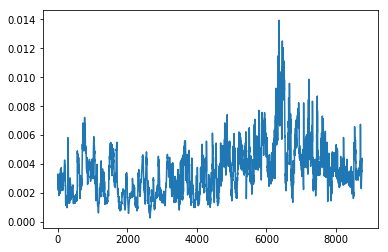

In [3]:
bb = np.squeeze(b, axis= 1)

b2 = bb[0:8759]

print(b2.shape)
plt.figure()
plt.plot(b2)
plt.show()

> ### Create two vectors of same data lagged by one value, plot as scatterplot and report correlation coefficient

In [4]:
q = bb[0:-2]

In [5]:
q1 = bb[1:-1]

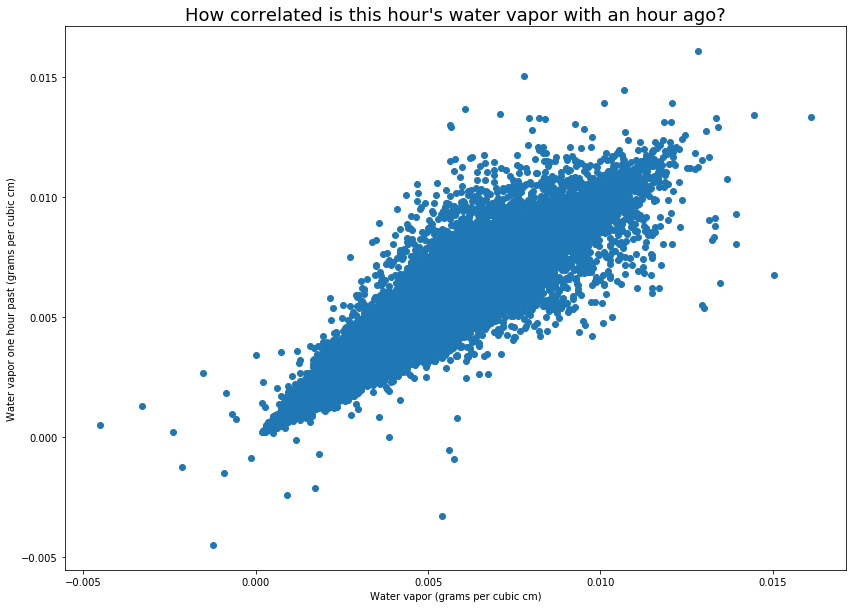

In [6]:
plt.figure(figsize=(14,10))
plt.plot(q,q1,'o')
plt.title('How correlated is this hour\'s water vapor with an hour ago?',fontsize=18)
plt.xlabel('Water vapor (grams per cubic cm)')
plt.ylabel('Water vapor one hour past (grams per cubic cm)')
plt.show()

In [7]:
print(q1.shape)
print(q.shape)
R = np.corrcoef(q.T,q1.T)
R[1,0]


(262300, 1)
(262300, 1)


0.97753742819222755

> ### Create two more vectors lagged by 40 values and plot along with correlation coefficient

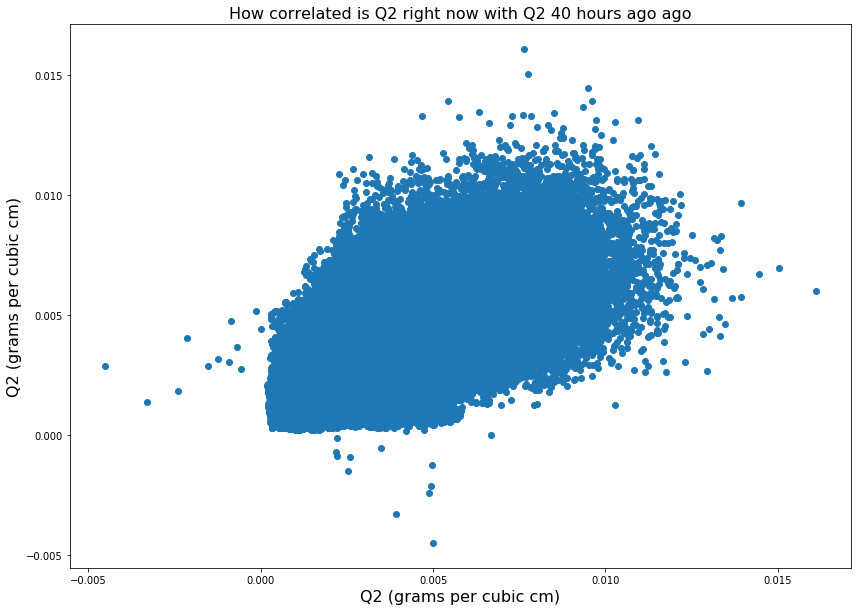

In [8]:
q0 = bb[40:-1] 
q40 = bb[0:-(41)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(q0,q40,'o')
plt.title('How correlated is Q2 right now with Q2 40 hours ago ago',fontsize=16)
plt.xlabel('Q2 (grams per cubic cm)',fontsize=16)
plt.ylabel('Q2 (grams per cubic cm)',fontsize=16)
plt.show()

In [9]:
print(q0.shape)
print(q40.shape)
R = np.corrcoef(q0.T,q40.T)
R[1,0]

(262261, 1)
(262261, 1)


0.59286503314900574

> ### Plot autocorrelation function for 72 hours 

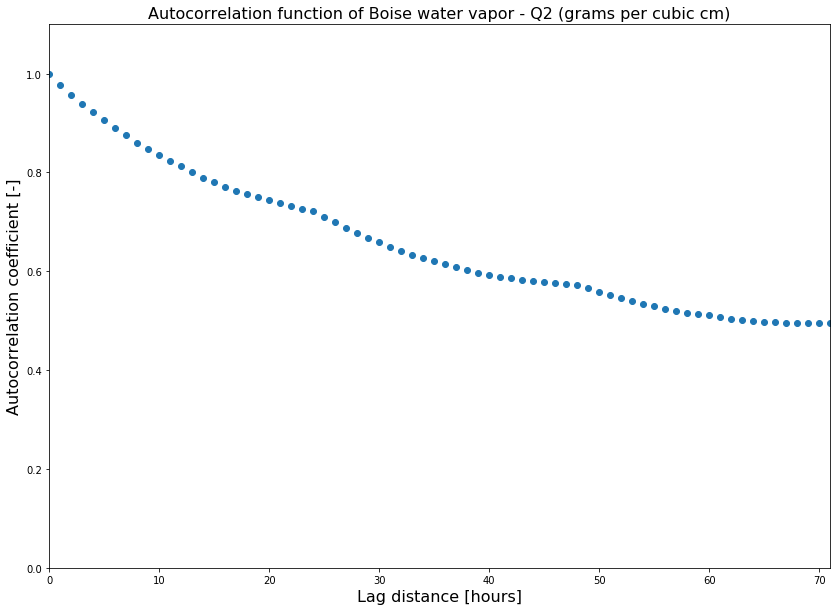

In [10]:
Nk = 72
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    q0 =bb[k:-1] 
    q40 = bb[0:-(1+k)]
    R = np.corrcoef(q0.T,q40.T)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Boise water vapor - Q2 (grams per cubic cm)',fontsize=16)
plt.xlabel('Lag distance [hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

> ### Plot autocorrelation function over 3 years

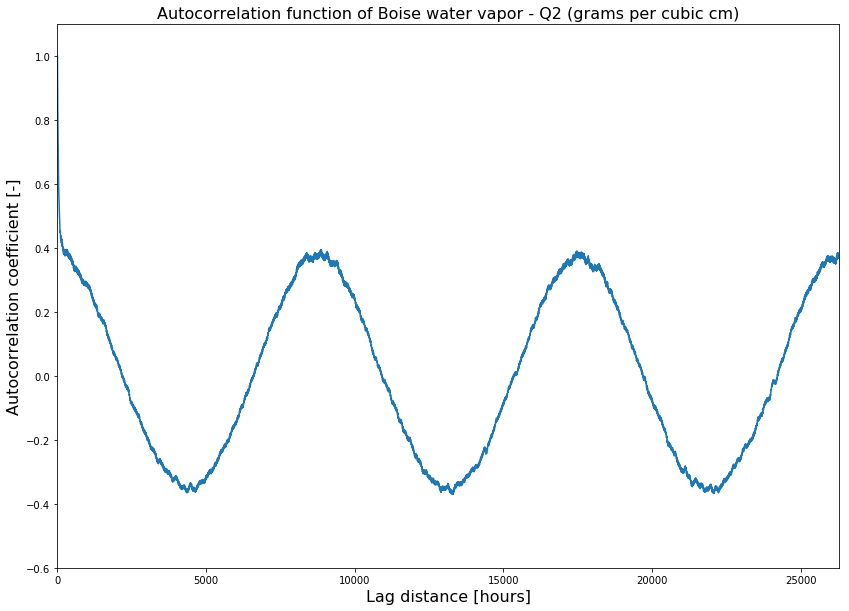

In [11]:
Nk = 24*365*3
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    q0 =bb[k:-1] 
    q40 = bb[0:-(1+k)]
    R = np.corrcoef(q0.T,q40.T)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(-.6,1.1)
plt.title('Autocorrelation function of Boise water vapor - Q2 (grams per cubic cm)',fontsize=16)
plt.xlabel('Lag distance [hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()